In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV

In [34]:
df = pd.read_csv("C:/Users/varghese.jacob/Documents/Resume/Train_Dataset (2).csv")
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,NaN,M,18932.0
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [35]:
df.shape

(5180, 22)

In [36]:
df.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5.180000e+03,5180.000000,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,5.112590e+06,0.278958,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.649371,11.165832,2.552838,4.385295,21692.296442
std,1.495482e+03,0.448530,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.706469,7.797783,3.234467,3.617643,4770.637922
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111296e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,5.112590e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,5.113885e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,5.115180e+06,1.000000,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [37]:
df.describe(include='object')

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,5180,5056,5180,5134,5142,5180
unique,3,3,6,3,5,4
top,Rarely,Analytics,Statistics,Male,Executive,Single
freq,3637,3219,2129,3094,2072,1776


In [38]:
df.apply(lambda x: len(x.unique()))

EmployeeID            5180
Attrition                2
Age                     45
TravelProfile            3
Department               4
HomeToWork              36
EducationField           6
Gender                   4
HourlnWeek              59
Involvement              5
WorkLifeBalance          5
Designation              6
JobSatisfaction          5
ESOPs                    2
NumCompaniesWorked      14
OverTime                 2
SalaryHikelastYear      17
WorkExperience          43
LastPromotion           18
CurrentProfile          20
MaritalStatus            4
MonthlyIncome         2373
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   int64  
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            5180 non-null   int64  
 16  Salary

In [40]:
df.Attrition.value_counts()

0    3735
1    1445
Name: Attrition, dtype: int64

In [41]:
df.corr()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
EmployeeID,1.000000,-0.023067,0.022454,-0.017823,0.011084,0.002321,-0.003441,-0.004581,0.009884,-0.000951,-0.009149,0.009667,0.026093,0.004350,0.012312,0.019203
Attrition,-0.023067,1.000000,-0.185756,0.093010,0.019705,0.144332,0.013608,0.126745,0.012200,0.049829,0.281113,-0.008903,-0.223575,-0.038496,-0.205628,-0.203650
Age,0.022454,-0.185756,1.000000,0.005808,-0.008466,-0.022560,-0.011691,-0.016108,-0.014061,0.309029,0.008509,0.006962,0.681935,0.240965,0.214335,0.490282
HomeToWork,-0.017823,0.093010,0.005808,1.000000,0.061177,-0.005532,0.020583,0.008096,0.008819,-0.015698,0.050323,0.059038,0.005730,0.013660,0.008359,-0.011774
HourlnWeek,0.011084,0.019705,-0.008466,0.061177,1.000000,-0.017570,0.008719,0.050505,0.004900,0.013201,0.042922,0.004509,-0.017155,-0.030324,0.000099,-0.020037
Involvement,0.002321,0.144332,-0.022560,-0.005532,-0.017570,1.000000,0.001419,-0.022173,0.028821,0.007583,0.018096,0.019096,-0.006431,0.015011,-0.050689,0.008979
WorkLifeBalance,-0.003441,0.013608,-0.011691,0.020583,0.008719,0.001419,1.000000,0.012179,0.001540,-0.006376,0.017203,-0.002519,-0.021507,-0.013111,-0.000612,-0.004484
JobSatisfaction,-0.004581,0.126745,-0.016108,0.008096,0.050505,-0.022173,0.012179,1.000000,-0.008894,0.052492,-0.024642,-0.006243,-0.004888,0.011069,0.009223,-0.010547
ESOPs,0.009884,0.012200,-0.014061,0.008819,0.004900,0.028821,0.001540,-0.008894,1.000000,-0.019383,0.021112,-0.032147,-0.010369,-0.015405,-0.019205,-0.007321
NumCompaniesWorked,-0.000951,0.049829,0.309029,-0.015698,0.013201,0.007583,-0.006376,0.052492,-0.019383,1.000000,-0.007109,0.005493,0.242811,0.013810,-0.072269,0.160120


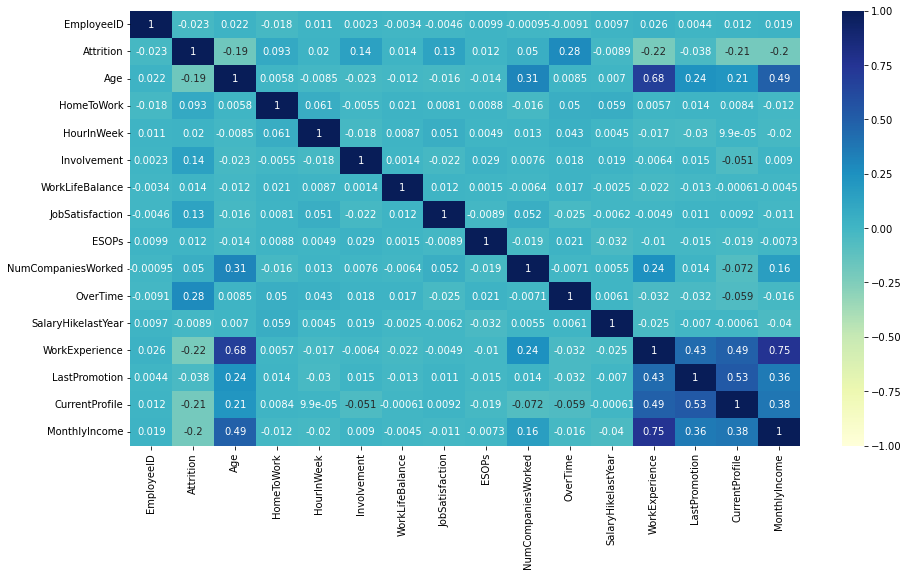

In [42]:
plt.rcParams["figure.figsize"] = [15,8]

# 'annot = True' returns the correlation values
# 'cmap' assigns color to each cell
# vmin, vmax : values to anchor the colormap, otherwise they are inferred from the data 
# we can pass various colors to 'cmap' as 'Blues', 'Greens', 'rainbow', 'prism', 'copper' and so on 
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

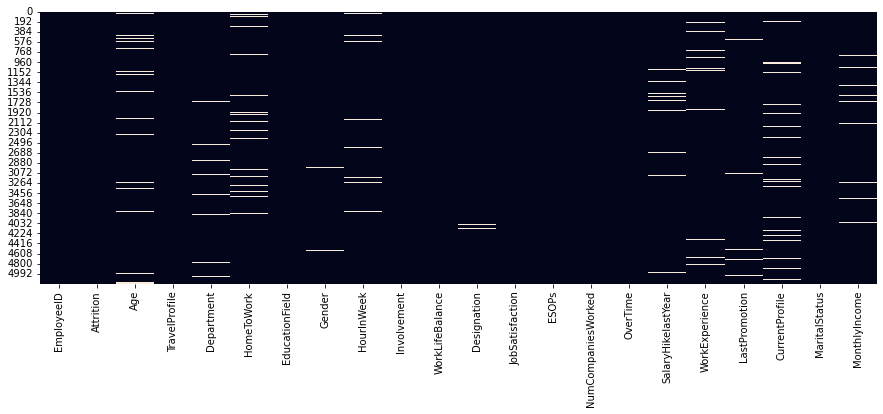

In [43]:

plt.rcParams['figure.figsize'] = [15,5]
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [44]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (total/df.shape[0])*100  

dfmissing = pd.concat([total, percent,], axis=1, keys=['Total', 'Percent'])
dfmissing['Type'] = df[dfmissing.index].dtypes
dfmissing

,Total,Percent,Type
Age,316,6.100386,float64
CurrentProfile,311,6.003861,float64
HourlnWeek,287,5.540541,float64
HomeToWork,255,4.922780,float64
WorkExperience,187,3.610039,float64
SalaryHikelastYear,169,3.262548,float64
Department,124,2.393822,object
MonthlyIncome,93,1.795367,float64
LastPromotion,70,1.351351,float64
Gender,46,0.888031,object


In [45]:

print('Mean of the age',df.Age.mean())
df.Age.replace(np.NaN,int(df.Age.mean()),inplace=True)

Mean of the age 37.108552631578945


In [46]:
print('Mean of the CurrentProfile',df.CurrentProfile.mean())
df.CurrentProfile.replace(np.NaN,df.CurrentProfile.mean(),inplace=True)


Mean of the CurrentProfile 4.38529472170877


In [47]:

print('Mean of the HourlnWeek',df.HourlnWeek.mean())
df.HourlnWeek.replace(np.NaN,int(df.HourlnWeek.mean()),inplace=True)

Mean of the HourlnWeek 57.979767014101775


In [48]:

print('Mean of the HomeToWork',df.HomeToWork.mean())

df.HomeToWork.replace(np.NaN,int(df.HourlnWeek.mean()),inplace=True)

Mean of the HomeToWork 11.10741116751269


In [49]:

print('Mean of the WorkExperience',df.WorkExperience.mean())

df.WorkExperience.replace(np.NaN,int(df.WorkExperience.mean()),inplace=True)

Mean of the WorkExperience 11.165832165031043


In [50]:
df.Gender.replace({'F':'Female'},inplace=True)
df.Gender.replace(np.NaN,'Male',inplace=True)

In [51]:
df.Designation.value_counts()

Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: Designation, dtype: int64

In [52]:
df.Designation.replace(np.NaN,df.Designation.mode()[0],inplace=True)


In [53]:
df.Department.replace(np.NaN,df.Department.mode()[0],inplace=True)

In [54]:
df.MonthlyIncome.replace(np.NaN,df.MonthlyIncome.mean(),inplace=True)

In [55]:
df.SalaryHikelastYear.replace(np.NaN,df.SalaryHikelastYear.mean(),inplace=True)

In [56]:
df.LastPromotion.replace(np.NaN,df.LastPromotion.mean(),inplace=True)

# Outlier

In [57]:
df.Attrition.value_counts()

0    3735
1    1445
Name: Attrition, dtype: int64

In [58]:
dftarget = df.Attrition

dffeature = df.drop('Attrition',axis=1)

In [59]:
dffeature

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,1,...,1,1,1,1,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,3,...,2,0,8,0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5,3,...,2,1,3,0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,2,...,4,1,1,0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,4,...,4,1,8,0,21.0,12.0,1.0,9.000000,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176,36.0,Rarely,Analytics,13.0,CA,Female,53.0,3,3,...,3,0,4,1,22.0,11.0,1.0,5.000000,Single,22142.0
5176,5115177,37.0,Rarely,Marketing,9.0,CA,Female,66.0,1,4,...,4,1,9,0,23.0,8.0,0.0,2.000000,Single,17109.0
5177,5115178,29.0,Rarely,Analytics,57.0,CA,Female,62.0,4,2,...,1,1,6,0,19.0,8.0,0.0,3.000000,M,17532.0
5178,5115179,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3,4,...,3,0,1,0,28.0,8.0,5.0,7.000000,Divorsed,17942.0


In [60]:
df_num = dffeature.select_dtypes(include = [np.number]).drop(['EmployeeID','HomeToWork','NumCompaniesWorked','LastPromotion','ESOPs'],axis=1)
df_cat = dffeature.select_dtypes(include = [np.object])

In [61]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [62]:
xscaler = StandardScaler()
num_scaled = xscaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)


In [63]:
df_num_scaled

,Age,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,OverTime,SalaryHikelastYear,WorkExperience,CurrentProfile,MonthlyIncome
0,-0.234558,0.876690,-2.552472,-1.427005,-1.597145,1.479748,-0.178147,-0.543413,0.000000,-0.583924
1,-0.569334,0.322550,0.886527,-0.009033,-0.852347,-0.675791,-0.178147,-0.935312,0.000000,-0.615020
2,-0.680926,-1.023217,2.032860,-0.009033,-0.852347,-0.675791,1.467880,0.109752,-0.395008,0.084343
3,-0.346150,-2.052333,-0.259806,-0.718019,0.637248,-0.675791,0.644866,-0.804679,-0.395008,-0.294109
4,-0.011375,-0.706566,-0.259806,0.699952,0.637248,-0.675791,0.096191,0.109752,1.315854,-0.003870
...,...,...,...,...,...,...,...,...,...,...
5175,-0.122967,-0.389915,-0.259806,-0.009033,-0.107550,1.479748,0.370528,-0.020881,0.175279,0.095132
5176,-0.011375,0.639201,-2.552472,0.699952,0.637248,-0.675791,0.644866,-0.412780,-0.680152,-0.969568
5177,-0.904110,0.322550,0.886527,-0.718019,-1.597145,-0.675791,-0.452485,-0.412780,-0.395008,-0.880085
5178,-1.238886,0.243387,-0.259806,0.699952,-0.107550,-0.675791,2.016555,-0.412780,0.745567,-0.793352


In [64]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)
X.head()

,Age,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,OverTime,SalaryHikelastYear,WorkExperience,CurrentProfile,MonthlyIncome,...,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_M,MaritalStatus_Married,MaritalStatus_Single
0,-0.234558,0.876690,-2.552472,-1.427005,-1.597145,1.479748,-0.178147,-0.543413,0.000000,-0.583924,...,0,0,1,1,0,0,0,1,0,0
1,-0.569334,0.322550,0.886527,-0.009033,-0.852347,-0.675791,-0.178147,-0.935312,0.000000,-0.615020,...,0,1,0,1,0,0,0,0,0,1
2,-0.680926,-1.023217,2.032860,-0.009033,-0.852347,-0.675791,1.467880,0.109752,-0.395008,0.084343,...,0,1,0,0,1,0,0,0,0,1
3,-0.346150,-2.052333,-0.259806,-0.718019,0.637248,-0.675791,0.644866,-0.804679,-0.395008,-0.294109,...,0,1,0,0,1,0,0,0,0,0
4,-0.011375,-0.706566,-0.259806,0.699952,0.637248,-0.675791,0.096191,0.109752,1.315854,-0.003870,...,0,1,0,0,1,0,0,0,0,0


In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(X,dftarget,random_state = 10,test_size = 0.2)
print('X_train', xtrain.shape)
print('y_train', ytrain.shape)

# print dimension of test set
print('X_test', xtest.shape)
print('y_test', ytest.shape)

X_train (4144, 27)
y_train (4144,)
X_test (1036, 27)
y_test (1036,)


In [66]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')
knn_model = knn_classification.fit(xtrain,ytrain)

In [67]:

def plot_confusion_matrix(model):
    

    ypred = model.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [68]:
def plot_roc(model):

    y_pred_prob = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))
    plt.grid(True)

In [69]:
def get_test_report(model):
    test_pred = model.predict(xtest)
    return(classification_report(ytest, test_pred))

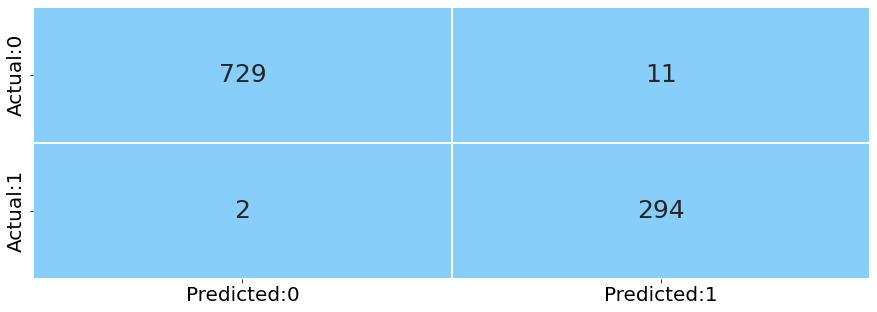

In [70]:
plot_confusion_matrix(knn_model)

In [71]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       740
           1       0.96      0.99      0.98       296

    accuracy                           0.99      1036
   macro avg       0.98      0.99      0.98      1036
weighted avg       0.99      0.99      0.99      1036



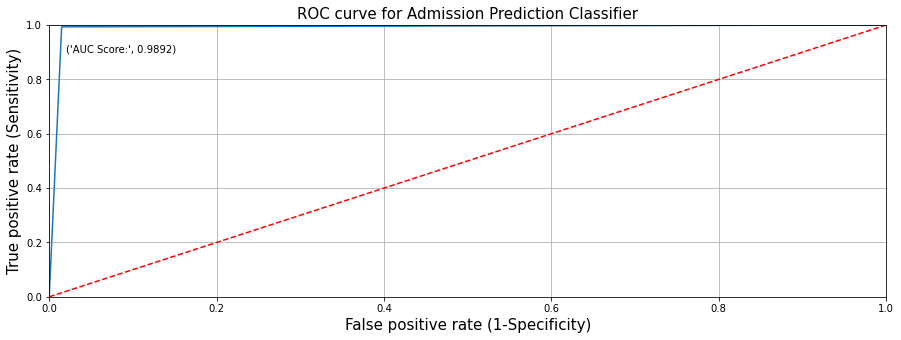

In [72]:
plot_roc(knn_model)

In [73]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 7, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [74]:
test_pred = knn_model.predict(xtest)

In [75]:
dftest = pd.read_csv("C:/Users/varghese.jacob/Documents/Resume/Test_Dataset (2).csv")
dftest.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [76]:
dftest.shape

(2630, 21)

In [77]:
dftest.describe(include='object')

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,2630,2572,2630,2600,2600,2630
unique,3,3,6,3,5,4
top,Rarely,Analytics,Statistics,Male,Executive,Single
freq,1852,1675,1040,1574,993,933


In [78]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [79]:
testtotal = dftest.isnull().sum().sort_values(ascending=False)
testpercent = (testtotal/dftest.shape[0])*100  

dftestmissing = pd.concat([testtotal, testpercent,], axis=1, keys=['Total', 'Percent'])
dftestmissing['Type'] = dftest[dftestmissing.index].dtypes
dftestmissing

,Total,Percent,Type
Age,142,5.399240,float64
HourlnWeek,136,5.171103,float64
CurrentProfile,134,5.095057,float64
HomeToWork,126,4.790875,float64
WorkExperience,122,4.638783,float64
SalaryHikelastYear,94,3.574144,float64
Department,58,2.205323,object
LastPromotion,57,2.167300,float64
MonthlyIncome,33,1.254753,float64
Designation,30,1.140684,object


In [80]:
dftest.Age.replace(np.NaN,int(dftest.Age.mean()),inplace=True)


In [81]:
print('Mean of the CurrentProfile',dftest.CurrentProfile.mean())

dftest.CurrentProfile.replace(np.NaN,int(dftest.CurrentProfile.mean()),inplace=True)
dftest.CurrentProfile.shape

Mean of the CurrentProfile 4.506810897435898


(2630,)

In [82]:
print('Mean of the HourlnWeek',dftest.HourlnWeek.mean())
dftest.HourlnWeek.replace(np.NaN,int(df.HourlnWeek.mean()),inplace=True)


Mean of the HourlnWeek 57.86327185244587


In [83]:

print('Mean of the HomeToWork',dftest.HomeToWork.mean())
dftest.HomeToWork.replace(np.NaN,int(dftest.HourlnWeek.mean()),inplace=True)


Mean of the HomeToWork 11.428115015974441


In [84]:

print('Mean of the WorkExperience',dftest.WorkExperience.mean())

dftest.WorkExperience.replace(np.NaN,int(dftest.WorkExperience.mean()),inplace=True)


Mean of the WorkExperience 11.525518341307816


In [85]:
dftest.SalaryHikelastYear.replace(np.NaN, dftest.SalaryHikelastYear.mean(),inplace=True)

In [86]:
dftest.Department.replace(np.NaN,df.Department.mode()[0],inplace=True)

In [87]:
dftest.LastPromotion.replace(np.NaN,dftest.LastPromotion.mean(),inplace=True)

In [88]:
dftest.Gender.replace({'F':'Female'},inplace=True)
dftest.Gender.replace(np.NaN,'Male',inplace=True)


In [89]:
dftest.MonthlyIncome.replace(np.NaN,dftest.MonthlyIncome.mean(),inplace=True)

In [90]:
dftest.Designation.replace(np.NaN,dftest.Designation.mode()[0],inplace=True)

In [91]:
dftestfeature = dftest.copy()

In [92]:
dftest_num = dftestfeature.select_dtypes(include = [np.number]).drop(['EmployeeID','HomeToWork','NumCompaniesWorked','LastPromotion','ESOPs'],axis=1)
dftest_cat = dftestfeature.select_dtypes(include = [np.object])

In [93]:
testdummy_var = pd.get_dummies(data = dftest_cat, drop_first = True)

In [94]:
testxscaler = StandardScaler()
testnum_scaled = testxscaler.fit_transform(dftest_num)
dftest_num_scaled = pd.DataFrame(testnum_scaled, columns = dftest_num.columns)

In [95]:
dftest_num_scaled

,Age,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,OverTime,SalaryHikelastYear,WorkExperience,CurrentProfile,MonthlyIncome
0,-2.132110,1.721272,-0.270986,-0.754935,-0.086422,-0.701870,-0.994317,-1.449631,-1.282493,-0.972417
1,-1.912335,0.091674,-2.533508,-0.048861,-1.581743,1.424765,-0.720915,-1.197546,-0.137663,-0.559341
2,1.384290,1.410872,-0.270986,-0.048861,1.408900,1.424765,0.372694,0.819132,-0.423870,-0.639782
3,-0.593685,1.178073,1.991535,-0.754935,-0.086422,1.424765,-0.994317,-0.819419,-0.423870,-0.250028
4,0.175528,-1.227524,0.860274,-1.461009,1.408900,-0.701870,-0.174111,-0.315250,0.720960,0.625931
...,...,...,...,...,...,...,...,...,...,...
2625,0.944740,1.410872,-0.270986,1.363286,1.408900,1.424765,-0.720915,-0.189207,-0.423870,0.975762
2626,-0.923348,1.721272,0.860274,0.657212,1.408900,-0.701870,-0.720915,-0.567334,-0.137663,-0.519417
2627,0.724965,-1.227524,0.860274,-1.461009,-1.581743,-0.701870,-0.447513,1.575386,3.583035,0.676726
2628,-0.044247,-0.063526,0.860274,-0.048861,0.661239,-0.701870,-0.720915,-1.197546,-0.996285,-0.901858


In [96]:
ytests = pd.concat([dftest_num_scaled, testdummy_var], axis = 1)
ytests.shape

(2630, 27)

In [97]:
xtest.shape

(1036, 27)

In [98]:
xtrain.shape

(4144, 27)

In [99]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')
knn_model = knn_classification.fit(xtrain,ytrain)

In [100]:
test_pred = knn_model.predict(ytests)

In [101]:
dftest["Attrition"] = test_pred

In [102]:
dftest.Attrition

0       1
1       0
2       0
3       1
4       0
       ..
2625    0
2626    0
2627    0
2628    1
2629    0
Name: Attrition, Length: 2630, dtype: int64

In [103]:
test_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [105]:
dftest[['EmployeeID','Attrition']].to_csv('submission code.csv')